# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Read the data files

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c home-credit-default-risk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 99% 681M/688M [00:27<00:00, 25.6MB/s]
100% 688M/688M [00:27<00:00, 26.5MB/s]


In [3]:
!unzip /content/home-credit-default-risk.zip -d data

Archive:  /content/home-credit-default-risk.zip
  inflating: data/HomeCredit_columns_description.csv  
  inflating: data/POS_CASH_balance.csv  
  inflating: data/application_test.csv  
  inflating: data/application_train.csv  
  inflating: data/bureau.csv         
  inflating: data/bureau_balance.csv  
  inflating: data/credit_card_balance.csv  
  inflating: data/installments_payments.csv  
  inflating: data/previous_application.csv  
  inflating: data/sample_submission.csv  


In [4]:
train = pd.read_csv("data/application_train.csv")
test = pd.read_csv("data/application_test.csv")

In [5]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


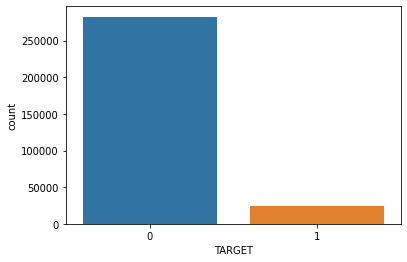

In [7]:
sns.countplot(train.TARGET)

In [8]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Hiện tượng imbalanced.
target 0: trả khoản vay đúng hạn (91.92%)
target 1: gặp khó khăn khi trả khoản vay (8.08%)

In [9]:
print("Shape của tập train: {}".format(train.shape))
print("Shape của tập test: {}".format(test.shape))

Shape của tập train: (307511, 122)
Shape của tập test: (48744, 121)


In [10]:
print("Tập train: \n{}".format(train.dtypes.value_counts()))
print()
print("Tập test: \n{}".format(test.dtypes.value_counts())) 

Tập train: 
float64    65
int64      41
object     16
dtype: int64

Tập test: 
float64    65
int64      40
object     16
dtype: int64


# Check missing values

In [11]:
def missing_columns(dataframe):
    # tìm các giá trị thiếu 
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # phần trăm của các giá trị thiếu 
    missing_values_pct = 100 * missing_values/len(dataframe)
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']

    return concat_values[concat_values.iloc[:,1]!=0]

In [12]:
missing_columns(train)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,214865,0.698723,69.9
COMMONAREA_AVG,214865,0.698723,69.9
COMMONAREA_MODE,214865,0.698723,69.9
NONLIVINGAPARTMENTS_MODE,213514,0.694330,69.4
NONLIVINGAPARTMENTS_AVG,213514,0.694330,69.4
...,...,...,...
EXT_SOURCE_2,660,0.002146,0.2
AMT_GOODS_PRICE,278,0.000904,0.1
AMT_ANNUITY,12,0.000039,0.0
CNT_FAM_MEMBERS,2,0.000007,0.0


In [13]:
missing_columns(test)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_AVG,33495,0.687161,68.7
COMMONAREA_MODE,33495,0.687161,68.7
COMMONAREA_MEDI,33495,0.687161,68.7
NONLIVINGAPARTMENTS_AVG,33347,0.684125,68.4
NONLIVINGAPARTMENTS_MODE,33347,0.684125,68.4
...,...,...,...
OBS_30_CNT_SOCIAL_CIRCLE,29,0.000595,0.1
OBS_60_CNT_SOCIAL_CIRCLE,29,0.000595,0.1
DEF_60_CNT_SOCIAL_CIRCLE,29,0.000595,0.1
AMT_ANNUITY,24,0.000492,0.0


In [14]:
# Số lớp duy nhất trong mỗi cột
train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [15]:
test.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Handling Categorical variables - Label Encoding and One Hot Encoding.

In [16]:
# Tạo label encode cho object
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transform_counter = 0

for col in train.select_dtypes('object').columns:
    
    # chỉ chọn những cột có số lượng giá trị duy nhất trong category nhỏ hơn hoặc bằng 2  
    if pd.Series.nunique(train[col]) <= 2:
        train[col] = le.fit_transform(train[col].astype(str))
        test[col] = le.fit_transform(test[col].astype(str))
        
        transform_counter+=1
        
print("Label encoded {} columns.".format(transform_counter))    

Label encoded 4 columns.


In [17]:
# one-hot encode cho các biến categorical
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [18]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 230)
Testing Features shape:  (48744, 226)


In [19]:
target = train['TARGET']

In [20]:
train, test = train.align(test,axis=1,join='inner')

In [21]:
train['TARGET'] = target

In [22]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 227)
Testing Features shape:  (48744, 226)


# Analysis and Feature Engineering

In [23]:
(train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Text(0.5, 0, 'Age of the client (Years)')

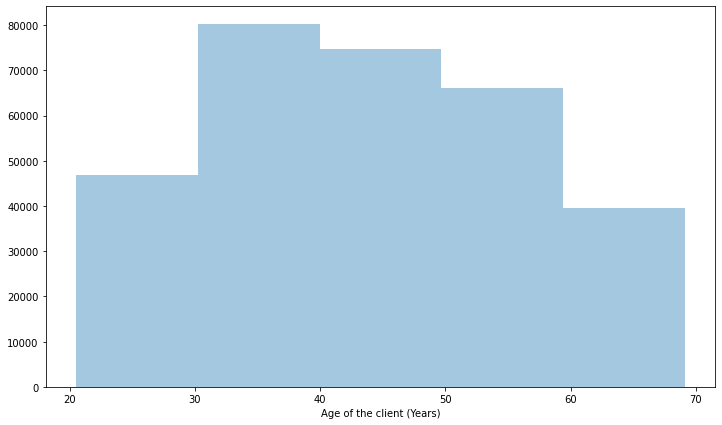

In [24]:
fig, ax = plt.subplots(figsize =(12,7))
sns.distplot(train['DAYS_BIRTH']/-365,bins=5,kde=False)
plt.xlabel("Age of the client (Years)")

In [25]:
(train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Thời gian mà người này bắt đầu công việc hiện tại (tính bằng năm)')

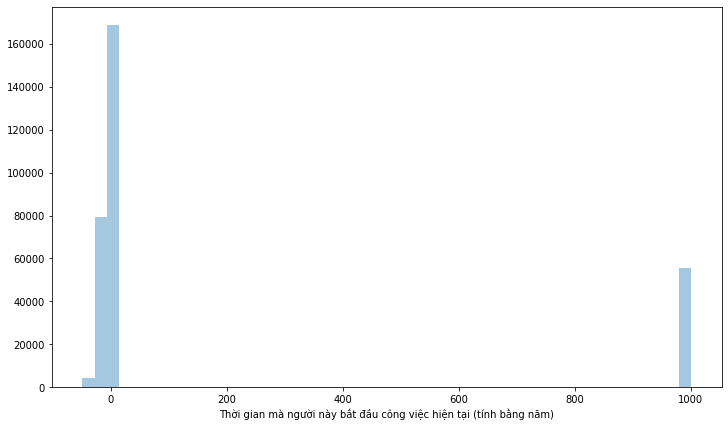

In [26]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(train['DAYS_EMPLOYED']/365,kde=False)
plt.xlabel("Thời gian mà người này bắt đầu công việc hiện tại (tính bằng năm)")

In [27]:
thousand_anomalies = train[(train['DAYS_EMPLOYED']/365>=900) & (train['DAYS_EMPLOYED']/365<=1100)]
len(thousand_anomalies)

55374

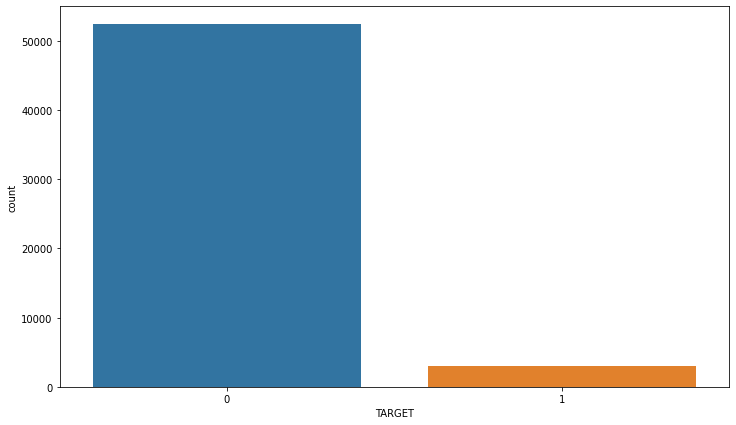

In [28]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='TARGET',data=thousand_anomalies)

In [29]:
# Lấy index of anomalies and non anomalies
anomalies_index = pd.Index(thousand_anomalies.index)
non_anomalies_index = train.index.difference(anomalies_index)

In [30]:
# get the anomalies records
non_anomalies = train.iloc[non_anomalies_index]

In [31]:
# get the anomaly targets
anomalies_target = thousand_anomalies['TARGET'].value_counts()
non_anomalies_target = non_anomalies['TARGET'].value_counts()

In [32]:
# find the default rate for anomalies and non anomalies

print("Anomalies have a default rate of {}%".format(100*anomalies_target[1]/(anomalies_target[1]+anomalies_target[0])))
print("Non Anomalies have a default rate of {}%".format(100*non_anomalies_target[1]/(non_anomalies_target[1]+non_anomalies_target[0])))

Anomalies have a default rate of 5.399646043269405%
Non Anomalies have a default rate of 8.659974537652149%


In [33]:
# Create an anomalous flag column
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace({365243: np.nan})

Text(0.5, 0, 'Years worked before application')

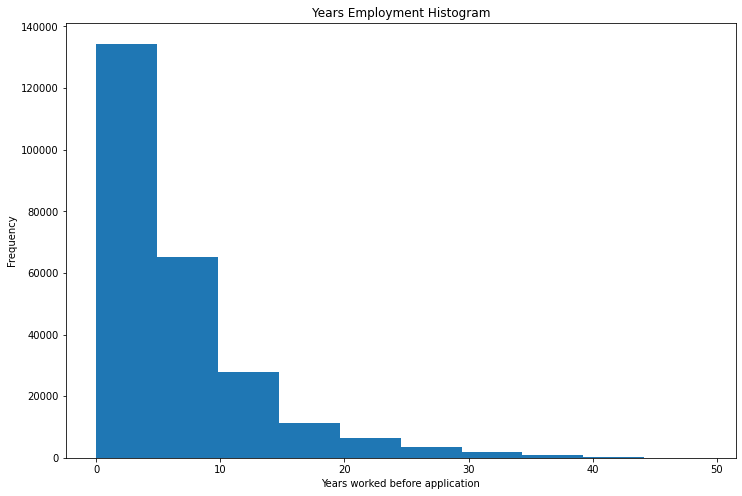

In [34]:
# Looking at the years employed for anomalies

plt.figure(figsize=(12,8))
(train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram')
plt.xlabel("Years worked before application")

In [35]:
# Create an anomalous flag column
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace({365243: np.nan})

In [36]:
# Finding out the most correlated features for the TARGET variable. 
corr_train = train.corr()['TARGET']

In [37]:
print(corr_train.sort_values().tail(10))
corr_train.sort_values().head(10)

REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_EMPLOYED_ANOM                     -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
Name: TARGET, dtype: float64

# Filling up the missing values for the most correlated variables

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
poly_fitting_vars = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1','DAYS_BIRTH']

In [40]:
imputer = SimpleImputer(missing_values= np.nan, strategy='median')

In [41]:
train[poly_fitting_vars] = imputer.fit_transform(train[poly_fitting_vars])

In [42]:
train[poly_fitting_vars].shape

(307511, 4)

In [43]:
test[poly_fitting_vars] = imputer.transform(test[poly_fitting_vars])

In [44]:
test[poly_fitting_vars].shape

(48744, 4)

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly_feat = PolynomialFeatures(degree=4)

In [47]:
poly_interaction_train = poly_feat.fit_transform(train[poly_fitting_vars])

In [48]:
poly_interaction_train.shape

(307511, 70)

In [49]:
poly_interaction_test = poly_feat.fit_transform(test[poly_fitting_vars])

In [50]:
poly_interaction_test.shape

(48744, 70)

In [51]:
poly_interaction_train = pd.DataFrame(poly_interaction_train,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [52]:
poly_interaction_train.shape

(307511, 70)

In [53]:
poly_interaction_test =  pd.DataFrame(poly_interaction_test,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [54]:
poly_interaction_test.shape

(48744, 70)

## Add the 'TARGET' column

In [55]:
poly_interaction_train['TARGET'] = train['TARGET']

In [56]:
interaction = poly_interaction_train.corr()['TARGET'].sort_values()

## Variables have a strong correlation

In [57]:
print(interaction.tail(15))
(interaction.head(15))

EXT_SOURCE_2^3 DAYS_BIRTH                            0.140230
EXT_SOURCE_3^2 DAYS_BIRTH                            0.141777
EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH               0.144206
EXT_SOURCE_2^2 DAYS_BIRTH                            0.149313
EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH               0.149813
EXT_SOURCE_3 DAYS_BIRTH                              0.150109
EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH                 0.151816
EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH                 0.155891
EXT_SOURCE_2 DAYS_BIRTH                              0.156873
EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH               0.164466
EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH               0.168159
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH    0.174173
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH                 0.181283
TARGET                                               1.000000
1                                                         NaN
Name: TARGET, dtype: float64


EXT_SOURCE_3 EXT_SOURCE_2                  -0.193939
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1     -0.189605
EXT_SOURCE_3 EXT_SOURCE_2^2                -0.176428
EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1   -0.174534
EXT_SOURCE_3^2 EXT_SOURCE_2                -0.172282
EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1   -0.170938
EXT_SOURCE_2 EXT_SOURCE_1                  -0.166625
EXT_SOURCE_3 EXT_SOURCE_1                  -0.164065
EXT_SOURCE_3^2 EXT_SOURCE_2^2              -0.162923
EXT_SOURCE_3 EXT_SOURCE_2^3                -0.161994
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2   -0.160677
EXT_SOURCE_2                               -0.160295
EXT_SOURCE_2^2 EXT_SOURCE_1                -0.156867
EXT_SOURCE_3                               -0.155892
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2     -0.154886
Name: TARGET, dtype: float64

## Get the names of the columns which have the highest correlation

In [58]:
set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'}))

{'EXT_SOURCE_2',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^3 DAYS_BIRTH',
 'EXT_SOURCE_3',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3^2 EXT_SOURCE_2^2'

## Choose the selected columns which have highest correlation to 'TARGET'

In [59]:
selected_inter_variables = list(set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'})))

In [60]:
poly_interaction_train[selected_inter_variables].head()

,EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,...,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2
0,0.139376,-206.575767,-54.318807,0.001343,0.005741,-15.261005,-28.791659,-109.495390,-48.326185,-346.733022,...,0.000424,0.011573,0.036649,0.021834,-2487.756636,0.003043,-91.172960,-1318.634256,-183.785678,0.009637
1,0.535276,-3247.125160,-2020.509913,0.110938,0.120520,-1495.178425,-1738.108981,-2793.283699,-2988.969365,-5583.975307,...,0.055495,0.166614,0.333073,0.193685,-10431.950422,0.103675,-3474.605044,-8973.906339,-4803.518937,0.207254
2,0.729567,-5357.456268,-2978.274675,0.164491,0.156373,-5129.588365,-3908.621640,-7031.006802,-5635.596478,-7724.580288,...,0.149722,0.369159,0.405575,0.281290,-10587.901540,0.205220,-4294.187521,-13895.327191,-10137.567875,0.225464
3,0.535276,-6254.966447,-4068.490949,0.121220,0.214075,-2755.323295,-3348.134986,-5147.479068,-3541.866544,-6616.894625,...,0.094300,0.270849,0.348166,0.329122,-12361.644326,0.176171,-4303.904125,-10172.925140,-5445.325225,0.226462
4,0.535276,-3254.993372,-1050.510985,0.029844,0.052705,-2889.718701,-1742.320648,-5398.555790,-1843.135727,-3443.335521,...,0.046790,0.270849,0.172754,0.163305,-6432.819536,0.087413,-1111.296208,-10669.126224,-5710.929881,0.055754


In [61]:
poly_interaction_test[selected_inter_variables].head()

,EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,...,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2
0,0.159520,-11435.028416,-9029.719944,0.015867,0.469296,-368.491942,-1824.110478,-2310.011305,-386.627243,-2423.698322,...,0.015123,0.120057,0.125965,0.594305,-15193.739370,0.094803,-1913.883926,-3069.315478,-489.615795,0.099469
1,0.432962,-2976.631403,-868.151015,0.015946,0.048060,-1913.170762,-1288.767295,-4418.799416,-987.604448,-2281.043619,...,0.030889,0.244619,0.126276,0.164783,-5268.465530,0.071345,-665.278990,-7821.019554,-3386.201665,0.036829
2,0.610991,-7095.269204,-4965.175946,0.182811,0.247788,-3785.063810,-4335.147954,-6194.955045,-5234.681105,-8567.521115,...,0.132186,0.309160,0.427564,0.354091,-14022.328504,0.216346,-5995.438444,-12243.044232,-7480.393855,0.299203
3,0.612704,-3744.932912,-1908.706472,0.097520,0.136570,-2758.358532,-2294.536289,-4501.941285,-2674.113111,-4364.443591,...,0.100592,0.322119,0.312281,0.267955,-7123.246872,0.164177,-2224.456866,-8563.154516,-5246.681115,0.159163
4,0.535276,-1122.099233,-477.663386,0.051920,0.036631,-755.260075,-600.633070,-1410.972511,-1590.465410,-2971.298294,...,0.024655,0.108203,0.227860,0.086051,-5550.962315,0.046061,-1264.843931,-6980.002306,-3736.229463,0.096997


## Get a list of unselected columns that are to be dropped

In [62]:
unselected_cols = [element for element in poly_interaction_train.columns if element not in selected_inter_variables]

##  Drop the unselected columns of the interaction dataframes on train and test both

In [63]:
poly_interaction_train = poly_interaction_train.drop(unselected_cols,axis=1)

In [64]:
poly_interaction_test = poly_interaction_test.drop(list(set(unselected_cols).difference({'TARGET'})),axis=1)

#### Dropping columns 'EXT_SOURCE_2' and 'EXT_SOURCE_3' since they're already present in the source dataset

In [65]:
train = train.join(poly_interaction_train.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [66]:
test = test.join(poly_interaction_test.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [67]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))

The train dataset dimensions are as follows: (307511, 254)
The test dataset dimensions are as follows: (48744, 253)


# Feature Engineering

In [68]:
train['DIR'] = train['AMT_CREDIT']/train['AMT_INCOME_TOTAL']
train['AIR'] = train['AMT_ANNUITY']/train['AMT_INCOME_TOTAL']
train['ACR'] = train['AMT_ANNUITY']/train['AMT_CREDIT']
train['DAR'] = train['DAYS_EMPLOYED']/train['DAYS_BIRTH']

In [69]:
test['DIR'] = test['AMT_CREDIT']/test['AMT_INCOME_TOTAL']
test['AIR'] = test['AMT_ANNUITY']/test['AMT_INCOME_TOTAL']
test['ACR'] = test['AMT_ANNUITY']/test['AMT_CREDIT']
test['DAR'] = test['DAYS_EMPLOYED']/test['DAYS_BIRTH']

In [70]:
corr_vals = train.corr()['TARGET']

In [71]:
corr_vals.tail(4)

DIR   -0.007727
AIR    0.014265
ACR    0.012704
DAR   -0.067955
Name: TARGET, dtype: float64

## Feature Imputing

In [72]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [73]:
features = list(set(train.columns).difference({'TARGET'}))

In [74]:
imputer = SimpleImputer(strategy="median")

## Feature Scaling

In [75]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [76]:
imputer.fit(train.drop(['TARGET'],axis=1))

SimpleImputer(strategy='median')

In [77]:
train_transformed = imputer.transform(train.drop(['TARGET'],axis=1))

In [78]:
test_transformed = imputer.transform(test)

In [79]:
train_transformed = scaler.fit_transform(train_transformed)

In [80]:
test_transformed = scaler.transform(test_transformed)

In [81]:
print("The train dataset dimensions are as follows: {}".format(train_transformed.shape))
print("The test dataset dimensions are as follows: {}".format(test_transformed.shape))

The train dataset dimensions are as follows: (307511, 257)
The test dataset dimensions are as follows: (48744, 257)


# Handling data imbalance: SMOTE

In [82]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [83]:
# Split target
X = train_transformed
y = target
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 282686, 1: 24825})


In [84]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [85]:
print('Dataset shape %s' % Counter(y_res))

Dataset shape Counter({1: 282686, 0: 282686})


# Modelling and evaluation

## Split the dataset into training set and validation set

In [86]:
from sklearn.model_selection import train_test_split

X_training_set, X_validation_set, y_training_set, y_validation_set = train_test_split(X_res, 
                                                                                      y_res, test_size=0.33, random_state=42)

## Logistic Regression

In [91]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

In [92]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_training_set, y_training_set)

In [93]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [94]:
# Chọn được siêu tham số tốt nhất cho mô hình để đào tạo và dự báo 
logistic_regressor = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs')

In [95]:
logistic_regressor.fit(X_training_set,y_training_set)

In [96]:
log_regression_pred = logistic_regressor.predict(X_validation_set)

In [97]:
pd.DataFrame({'target':log_regression_pred})['target'].value_counts()

In [98]:
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,log_regression_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,log_regression_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,log_regression_pred))

In [99]:
ConfusionMatrixDisplay.from_predictions(y_validation_set, log_regression_pred, labels=logistic_regressor.classes_)

# Tài liệu tham khảo 

[1]. Pamela Foohey; Sara Sternberg Greene, (2021), “Credit Scoring Duality”, SSRN Electronic Journal, DOI:10.2139/ssrn.3992749.

[2]. Sabato; Gabriele, (2010), “Credit Risk Scoring Models”, Available at SSRN: https://ssrn.com/abstract=1546347.

[3]. Benai Kumar, (2020), “10 Techniques to deal with Imbalanced Classes in Machine Learning”, https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/.

[4]. Dina Elreedy; Amir F. Atiya, (2019), “A Comprehensive Analysis of Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance”, Information Sciences.

[5]. Goedele Dierckx, (2020), “Logistic regression model”, Encyclopedia of Actuarial Science, DOI:10.1002/9780470012505.tal017.

[6]. Peter Calhoun; Xiaogang Su; Kelly M. Spoon; Richard A Levine, (2021), Random Forest, Wiley StatsRef: Statistics Reference Online (pp.1-20).

[7]. Hua Li; Yumeng Cao; Siwen Li; Jianbin Zhao, (2020), “XGBoost Model and Its Application to Personal Credit Evaluation”, Intelligent Systems, IEEE PP(99):1-1.

[8]. Godwin Ponsam; S.V. Juno Bella Gracia; G. Geetha; S. Karpaselvi, (2021), “Credit Risk Analysis using LightGBM and a comparative study of popular algorithms”, Conference: 2021 4th International Conference on Computing and Communications Technologies (ICCCT).

[9]. Dingling Ge; Jianyang Gu; Shunyu Chang; JingHui Cai, (2020), “Credit Card Fraud Detection Using Lightgbm Model”, Conference: 2020 International Conference on E-Commerce and Internet Technology (ECIT).

[10]. Baichuan Liu; Likun Lu; Zeng Qingtao; Yeli Li, (2021), “Implementation of credit scoring card model based on logistic regression and lightgbm”, Conference: 2021 International Conference on Control Science and Electric Power Systems (CSEPS).

[11]. Vũ Hữu Tiệp, (2020), “Machine learning cơ bản”, Nhà xuất bản khoa học và kĩ thuật.
